#### Data Engineering Exercise 1: Pandas 
The Parking Citation Dataset is a puplic dataset collecting millions of records information about parking tickets for a county in California. We only selected a million of this data for us to work with in this assignment. You can see the whole dataset here: https://data.lacity.org/Transportation/Parking-Citations/wjz9-h9np/data

In this exercise we want you to Extract data, Transform and/or clean data, and then Save it as a new file. Steps are:

    1. Extract CSV and Json file and append these files into a Pandas DataFrame.
    2. Remove the spaces from column headers
    3. Change data types
    4. Check if a column has any digits in its values
    5. Write a function to check if a column only has "Alphabet" values
    6. Write a function to check if a column only has "Numberic" values
    7. Add a column "Distance_to_pointA", calculating the distance between each point and point A
    8. Handle duplicates
    9. Drop columns with 70% missing values
    10. Remove a few records based on a condition 
    11. Fill missing values for a column
    12. Split a column into severl coulmns 
    13. Extract the "Issue_year" of  "Issue_Date" column and save it as a new column "Issue_year" as an integer type.
    14. Save the final modified dataframe into a partitioned parquet file! If you are not able to save it as a parquet file, go ahead and save it as a csv file. 


Here are some resources that you may need: 

    Pandas =  https://pandas.pydata.org/docs/reference/general_functions.html
    Numpy = https://numpy.org/doc/stable/reference/index.html


Good luck!

[Kanban board for project progress](https://trello.com/b/8Nslkzg7/python-project)

[Github Repo](https://github.com/Jared-Godar/python-project-cgi)

##### IMPORTS

In [ ]:
%pip install haversine

: 

In [ ]:
%pip install missingno

Python interpreter will be restarted.
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
Python interpreter will be restarted.


In [ ]:
import pandas as pd
import numpy as np
#from haversine import haversine, Unit
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
#import missingno as msno



: 

##### 1. Complete the below function to Extract CSV and Json file and Append these file to a Pandas DataFrame:
- csv file: parking_citation_sample.csv
- Json file: parking_citation_add.json

In [ ]:
def extract_data():
    '''
    This function reads in four csvs and one json file, and combines them, replces blanks with nan, and returns a Pandas DataFrame with all of the ticket data from the Los Angeles open data 
    '''
    df_pandas = pd.DataFrame(
        columns=['Ticket number', 'Issue Date', 'Issue time', 'Meter Id', 'Marked Time',
       'RP State Plate', 'Plate Expiry Date', 'VIN', 'Make', 'Body Style',
       'Color', 'Location', 'Route', 'Agency', 'Violation code',
       'Violation Description', 'Fine amount', 'Latitude', 'Longitude',
       'Agency Description', 'Color Description', 'Body Style Description'])
    
    ##read the shared folder data into spark dataframe
    df0 = pd.read_csv('https://raw.githubusercontent.com/matthewbrennerCGI/Project1Data/main/parking_citation_sample_0.csv')
    df1 = pd.read_csv('https://raw.githubusercontent.com/matthewbrennerCGI/Project1Data/main/parking_citation_sample_1.csv')
    df2 = pd.read_csv('https://raw.githubusercontent.com/matthewbrennerCGI/Project1Data/main/parking_citation_sample_2.csv')
    df3 = pd.read_csv('https://raw.githubusercontent.com/matthewbrennerCGI/Project1Data/main/parking_citation_sample_3.csv')
    df4 = pd.read_csv('https://raw.githubusercontent.com/matthewbrennerCGI/Project1Data/main/parking_citation_sample_4.csv')
    ## There is more parking citation data on the github repo, I am going to import and add it too
    df5 = pd.read_csv('https://raw.githubusercontent.com/matthewbrennerCGI/Project1Data/main/parking_citation_sample_5.csv')
    df_csv = pd.concat([df0, df1, df2, df3, df4, df5])
    # Drop the first column, and append it to pandas dataframe
    df_csv = df_csv.iloc[: , 1:]
    df_pandas = df_pandas.append(df_csv)

    # read and append json

    df_json = pd.read_json('https://raw.githubusercontent.com/matthewbrennerCGI/Project1Data/main/parking_citation_add.json')
    df_json = df_json.iloc[: , 1:]
    df_pandas = df_pandas.append(df_json)
    
    df_pandas = df_pandas.replace('', np.nan)
        
    return df_pandas

df_pandas = extract_data()
print('Shape of Data: '+ str(df_pandas.shape))

/databricks/python/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/databricks/python/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (2,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
Shape of Data: (1000003, 23)


##### 2. Remove the spaces from column headers and replace it with underline:

In [ ]:
# Make a copy to work with
df=df_pandas.copy()

In [ ]:
df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,...,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Agency Description,Color Description,Body Style Description,Unnamed: 0.1
0,1103341116,12/21/2015,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,NaN,NaN,NaN,0.0
1,1103700150,12/21/2015,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,NaN,NaN,NaN,1.0
2,1104803000,12/21/2015,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,NaN,NaN,NaN,2.0
3,1104820732,12/26/2015,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,...,2.0,0,17104h,NaN,6440041.1,1802686.2,NaN,NaN,NaN,3.0
4,1105461453,9/15/2015,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,...,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,NaN,NaN,NaN,4.0


In [ ]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')

In [ ]:
# Confirm rename
df.head(3)

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
0,1103341116,12/21/2015,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,NaN,NaN,NaN,0.0
1,1103700150,12/21/2015,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,NaN,NaN,NaN,1.0
2,1104803000,12/21/2015,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,NaN,NaN,NaN,2.0


##### 3. Change data types for (Ticket_number, Issue_Date ) columns into (string, datetime) respectively

In [ ]:
# Look at initial dtypes
df.dtypes

Out[7]: Ticket_number              object
Issue_Date                 object
Issue_time                float64
Meter_Id                   object
Marked_Time               float64
RP_State_Plate             object
Plate_Expiry_Date         float64
VIN                        object
Make                       object
Body_Style                 object
Color                      object
Location                   object
Route                      object
Agency                    float64
Violation_code             object
Violation_Description      object
Fine_amount               float64
Latitude                  float64
Longitude                 float64
Agency_Description        float64
Color_Description         float64
Body_Style_Description    float64
Unnamed:_0.1              float64
dtype: object

In [ ]:
# Convert Ticket number to string, Issue date to date, and display datatypes to confirm changes

#df['Ticket_number'] =pd.to_numeric(df['Ticket_number'])

df['Ticket_number'] =df['Ticket_number'].astype(str)
df['Issue_Date'] = pd.to_datetime(df['Issue_Date'])
df.dtypes

Out[8]: Ticket_number                     object
Issue_Date                datetime64[ns]
Issue_time                       float64
Meter_Id                          object
Marked_Time                      float64
RP_State_Plate                    object
Plate_Expiry_Date                float64
VIN                               object
Make                              object
Body_Style                        object
Color                             object
Location                          object
Route                             object
Agency                           float64
Violation_code                    object
Violation_Description             object
Fine_amount                      float64
Latitude                         float64
Longitude                        float64
Agency_Description               float64
Color_Description                float64
Body_Style_Description           float64
Unnamed:_0.1                     float64
dtype: object

**NOTE** I initially tried to change ticket number into an integer and found at least one ticket "number" contains a letter... 

"1107495524D" at position 456378

Reasonable to assume the D should be a 0 and this is OCR error. 
One possible solution is to drop the whole record, aother, which I will use is to change the `D` to a `0`.

In [ ]:
# View offending record

df[df['Ticket_number']=='1107495524D']

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
123053,1107495524D,2016-03-22,1540.0,NaN,NaN,CA,201612.0,NaN,CHEV,SU,...,3.0,22,225078,60.0,99999.0,99999.0,NaN,NaN,NaN,456405.0


In [ ]:
# Replace value

#df.replace(to_replace ='1107495524D',
#           value ='11074955240',
#           inplace=True)

In [ ]:
#Confirm update worked

#df[df['Ticket_number']=='1107495524D']
#df[df['Ticket_number']=='11074955240']

Discovered later in the `is_numeric` that there are 47 other instances of ticket numbers that end with a `D` - will change this one back to the original values for now

In [ ]:
# Revert corrected ticket number back to original
#df.replace(to_replace ='11074955240',
#           value ='1107495524D',
#           inplace=True)

#df[df['Ticket_number']==7'1107495524D']


##### 4. Check if a column has any digits in its values. Return the rows where this is true. Check for column "Violation_Description". 
e.g. 17104h --> True,     WHITE CURB --> False

In [ ]:
my_col = 'Violation_Description'

def has_digit(df, my_col):
    '''
    This function takes a dataframe and column name and employs regular expressions to see if there are any numerical digits in the cell and returns only the rows in the column containing digits.
    '''
    df[my_col]=df[my_col].astype(str)
    return df[df[my_col].str.contains(r'[0-9]') == True]
     

has_digit(df, my_col)

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,...,2.0,0,17104h,NaN,6440041.1,1802686.2,NaN,NaN,NaN,3.0
31,1109818625,2015-12-27,2235.0,NaN,NaN,CA,201601.0,NaN,CADI,PA,...,34.0,6344K2,NO PK BET 1-3AM,68.0,6438048.2,1839690.7,NaN,NaN,NaN,58.0
37,1110245776,2015-12-16,200.0,NaN,NaN,CA,201504.0,NaN,FREI,TR,...,1.0,18,22502A,63.0,99999.0,99999.0,NaN,NaN,NaN,64.0
39,1110245791,2015-12-21,815.0,NaN,NaN,CA,201608.0,NaN,KW,TR,...,1.0,18,22502A,63.0,99999.0,99999.0,NaN,NaN,NaN,66.0
63,1111915173,2015-12-27,45.0,NaN,NaN,CA,201601.0,NaN,TOYO,PA,...,2.0,0,17104h,NaN,6439868.3,1802686.9,NaN,NaN,NaN,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166490,4250681886,2015-01-13,1356.0,NaN,NaN,CA,201501.0,NaN,BMW,PA,...,51.0,22502E,18 IN. CURB/1 WAY,63.0,6418811.0,1841842.0,NaN,NaN,NaN,999828.0
166498,4250681971,2015-01-13,1614.0,NaN,NaN,CA,201506.0,NaN,BMW,PA,...,51.0,22502E,18 IN. CURB/1 WAY,63.0,6420909.5,1842261.4,NaN,NaN,NaN,999836.0
166544,4250682435,2015-01-04,1214.0,NaN,NaN,CA,201509.0,NaN,CADI,PA,...,54.0,22502A,18 IN. CURB/2 WAY,63.0,6523517.8,1816949.0,NaN,NaN,NaN,999882.0
3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,...,2.0,0,17104h,NaN,6440041.1,1802686.2,NaN,NaN,NaN,NaN


In [ ]:
# Test a couple other columns
has_digit(df, 'Agency_Description')

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1


In [ ]:
has_digit(df, 'Make')

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
134584,1111253150,2016-03-26,1854.0,NaN,NaN,CA,201605.0,NaN,A4,PA,...,36.0,80714,PRIVATE PROPERTY,68.0,6420102.2,1817944.7,nan,NaN,NaN,467936.0


##### 5. Write a function to check if a column only has "Alphabet" values, return the rows where this is not true. Check for "Make" column.

In [ ]:
# '[^a-zA-Z]+'
# re.search('[^a-zA-Z]+',str(x))
# lambda .apply

Look into using Regex instead of `isalpha()` see cell above for expression ideas

In [ ]:
my_col = 'Make'

def only_alpha(df, my_col):
    '''
    This function takes a dataframe and specified columns, check if a column only has alphabetical values and returns rows where this is not true.
    '''
    df[my_col].dropna()
    df[my_col]=df[my_col].astype(str)
    return df[df[my_col].str.isalpha()==False]

only_alpha(df_pandas, my_col)

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,...,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Agency Description,Color Description,Body Style Description,Unnamed: 0.1
134584,1111253150,3/26/2016,1854.0,NaN,NaN,CA,201605.0,NaN,A4,PA,...,36.0,80714,PRIVATE PROPERTY,68.0,6420102.2,1817944.7,NaN,NaN,NaN,467936.0


In [ ]:
#Test on another column
only_alpha(df, 'Body_Style')

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
27108,1110294275,2015-12-26,2200.0,NaN,NaN,CA,201508.0,NaN,TOYO,4D,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,27135.0
25625,1108714261,2016-01-19,1800.0,NaN,NaN,CA,201411.0,NaN,CHEV,4D,...,1.0,0,22651B,NaN,99999.0,99999.0,nan,NaN,NaN,192315.0
52192,1110462802,2016-01-28,2200.0,NaN,NaN,CA,201603.0,NaN,CHEV,2D,...,1.0,8069B,NO PARKING,73.0,6499459.8,1850822.0,nan,NaN,NaN,218882.0
120385,4276633454,2016-02-16,1029.0,NaN,NaN,CA,201604.0,NaN,HOND,2,...,54.0,80.69BS,NO PARK/STREET CLEAN,73.0,6460167.1,1857612.4,nan,NaN,NaN,287075.0
125116,1107729534,2016-02-04,755.0,NaN,NaN,CA,201512.0,NaN,MBNZ,4D,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,291806.0
123508,1107735786,2016-05-07,1750.0,NaN,NaN,CA,201606.0,NaN,LAMB,2D,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,456860.0
127075,1109497395,2016-04-23,1200.0,NaN,NaN,CA,201611.0,NaN,JEEP,4W,...,1.0,80732,EXCEED 72 HOURS,68.0,99999.0,99999.0,nan,NaN,NaN,460427.0
133768,1111199014,2016-04-13,115.0,389,NaN,CA,NaN,NaN,HOND,4D,...,77.0,2251156B,MISUSE/DP PRIVILEGE,363.0,6492533.8,1833227.4,nan,NaN,NaN,467120.0
82260,4279690936,2016-03-16,1124.0,HP26390,NaN,CA,201702.0,NaN,HOND,20,...,56.0,88.63B+,OFF STR/OVERTIME/MTR,58.0,6502848.0,1862134.2,nan,NaN,NaN,582274.0
151427,4280517640,2016-04-21,1640.0,NaN,NaN,CA,NaN,NaN,TOYT,2,...,56.0,80.56E4+,RED ZONE,93.0,99999.0,99999.0,nan,NaN,NaN,651441.0


In [ ]:
#Test on another column
only_alpha(df, 'Violation_Description')

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
0,1103341116,2015-12-21,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,0.0
1,1103700150,2015-12-21,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,1.0
2,1104803000,2015-12-21,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,nan,NaN,NaN,2.0
3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,...,2.0,0,17104h,NaN,6440041.1,1802686.2,nan,NaN,NaN,3.0
4,1105461453,2015-09-15,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,...,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,nan,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1108311013,2015-12-22,150.0,NaN,NaN,CA,201610.0,NaN,FORD,SU,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,NaN
26,1108311024,2015-12-22,205.0,NaN,NaN,CA,201607.0,NaN,MASE,PA,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,NaN
27,1108311035,2015-12-22,200.0,NaN,NaN,CA,201511.0,NaN,BMW,PA,...,1.0,99,5204,25.0,99999.0,99999.0,nan,NaN,NaN,NaN
28,1108311046,2015-12-22,225.0,NaN,NaN,CA,201512.0,NaN,PONT,PA,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,NaN


The function works as anticipated on the make column, and body style column, but seems to return unexpected results in the `Violation_Description` column. Will ask about this in office hours

##### 6. Write a function to check if a column only has "Numberic" values, return the rows where this is not true. Check for TicketNumber column.

In [ ]:
my_col = 'Ticket_number'

def only_number(df, my_col):
    '''
    This function takes a dataframe and specified columns, check if a column only has alphabetical values and returns rows where this is not true.
    '''
    df[my_col].dropna()
    df[my_col]=df[my_col].astype(str)
    return df[df[my_col].str.isnumeric()==False]

only_number(df, my_col)

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
123053,1107495524D,2016-03-22,1540.0,NaN,NaN,CA,201612.0,NaN,CHEV,SU,...,3.0,22,225078,60.0,99999.0,99999.0,nan,NaN,NaN,456405.0
123054,1107495535D,2016-03-25,1245.0,NaN,NaN,CA,201604.0,NaN,MINI,PA,...,3.0,8053,PKD IN/ON PARKWAY,63.0,99999.0,99999.0,nan,NaN,NaN,456406.0
123055,1107495546D,2016-05-07,1555.0,NaN,NaN,CA,201612.0,NaN,INFI,SU,...,3.0,22,225078,60.0,99999.0,99999.0,nan,NaN,NaN,456407.0
123057,1107502524D,2016-03-23,1230.0,NaN,NaN,CA,201601.0,NaN,JAGR,PA,...,3.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,456409.0
123058,1107503106D,2016-04-12,325.0,NaN,NaN,CA,201608.0,NaN,LEXU,PA,...,3.0,22658,PRIVATE PROPERTY,35.0,99999.0,99999.0,nan,NaN,NaN,456410.0
123059,1107503110D,2016-04-12,341.0,NaN,NaN,CA,201602.0,NaN,HYUN,PA,...,3.0,22658,PRIVATE PROPERTY,35.0,99999.0,99999.0,nan,NaN,NaN,456411.0
54225,1046703641D,2016-05-21,2053.0,NaN,NaN,CA,201606.0,NaN,BMW,PA,...,1.0,8069AP,NO STOP/STAND PM,93.0,99999.0,99999.0,nan,NaN,NaN,887563.0
55927,1107495550D,2016-06-14,1715.0,NaN,NaN,CA,201608.0,NaN,TOYO,PA,...,3.0,8709B,PARK-PSTD AREAS,93.0,99999.0,99999.0,nan,NaN,NaN,889265.0
55928,1107496121D,2014-12-17,1600.0,NaN,NaN,CA,201412.0,NaN,FRHT,TR,...,3.0,8709B,PARK-PSTD AREAS,93.0,6478224.6,1740950.3,nan,NaN,NaN,889266.0
55929,1107496132D,2014-12-28,1505.0,NaN,NaN,CA,201411.0,NaN,CADI,PA,...,3.0,8709K,PK OVR PNTD LNS,58.0,99999.0,99999.0,nan,NaN,NaN,889267.0


In [ ]:
df.dtypes

Out[21]: Ticket_number                     object
Issue_Date                datetime64[ns]
Issue_time                       float64
Meter_Id                          object
Marked_Time                      float64
RP_State_Plate                    object
Plate_Expiry_Date                float64
VIN                               object
Make                              object
Body_Style                        object
Color                             object
Location                          object
Route                             object
Agency                           float64
Violation_code                    object
Violation_Description             object
Fine_amount                      float64
Latitude                         float64
Longitude                        float64
Agency_Description                object
Color_Description                float64
Body_Style_Description           float64
Unnamed:_0.1                     float64
dtype: object

In [ ]:
# Test other columns

only_number(df, 'Plate_Expiry_Date')


,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
0,1103341116,2015-12-21,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,0.0
1,1103700150,2015-12-21,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,1.0
2,1104803000,2015-12-21,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,nan,NaN,NaN,2.0
3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,nan,NaN,ACUR,PA,...,2.0,0,17104h,NaN,6440041.1,1802686.2,nan,NaN,NaN,3.0
4,1105461453,2015-09-15,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,...,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,nan,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1108311013,2015-12-22,150.0,NaN,NaN,CA,201610.0,NaN,FORD,SU,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,NaN
26,1108311024,2015-12-22,205.0,NaN,NaN,CA,201607.0,NaN,MASE,PA,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,NaN
27,1108311035,2015-12-22,200.0,NaN,NaN,CA,201511.0,NaN,BMW,PA,...,1.0,99,5204,25.0,99999.0,99999.0,nan,NaN,NaN,NaN
28,1108311046,2015-12-22,225.0,NaN,NaN,CA,201512.0,NaN,PONT,PA,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,NaN


##### 7. Add a column "Distance_to_pointA", collecting the distance between each point and the point A: Ya= 6439997, Xa= 1802686. 
Drop rows with either Nan or values like 99999. 

Note: Parking citations with latitude / longitude (XY) in US Feet coordinates according to the NAD_1983_StatePlane_California_V_FIPS_0405_Feet projection.

Can compute pythagorean distances 
or
Use [haversine distance](https://pypi.org/project/haversine/) library.

Will start with pythagorean for MVP. If time allows I will also use Haversine and compare the differences

In [ ]:

# %pip install haversine
# moved install to the top of the notebook since it restarts the kernel

In [ ]:
df.dtypes

Out[24]: Ticket_number                     object
Issue_Date                datetime64[ns]
Issue_time                       float64
Meter_Id                          object
Marked_Time                      float64
RP_State_Plate                    object
Plate_Expiry_Date                 object
VIN                               object
Make                              object
Body_Style                        object
Color                             object
Location                          object
Route                             object
Agency                           float64
Violation_code                    object
Violation_Description             object
Fine_amount                      float64
Latitude                         float64
Longitude                        float64
Agency_Description                object
Color_Description                float64
Body_Style_Description           float64
Unnamed:_0.1                     float64
dtype: object

In [ ]:
# Look at df
df.head(5)

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
0,1103341116,2015-12-21,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,0.0
1,1103700150,2015-12-21,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,1.0
2,1104803000,2015-12-21,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,nan,NaN,NaN,2.0
3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,nan,NaN,ACUR,PA,...,2.0,0,17104h,NaN,6440041.1,1802686.2,nan,NaN,NaN,3.0
4,1105461453,2015-09-15,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,...,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,nan,NaN,NaN,4.0


In [ ]:
# Figure our how many offending records there are

df[(df['Latitude']==99999.0) | (df['Longitude']==99999.0)]

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1
0,1103341116,2015-12-21,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,0.0
1,1103700150,2015-12-21,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,1.0
4,1105461453,2015-09-15,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,...,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,nan,NaN,NaN,4.0
5,1108321712,2015-12-21,935.0,NaN,NaN,CA,201506.0,NaN,TOYO,PA,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,32.0
7,1108321734,2015-12-21,1058.0,NaN,NaN,CA,201506.0,NaN,DODG,HS,...,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,nan,NaN,NaN,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1108311013,2015-12-22,150.0,NaN,NaN,CA,201610.0,NaN,FORD,SU,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,NaN
26,1108311024,2015-12-22,205.0,NaN,NaN,CA,201607.0,NaN,MASE,PA,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,NaN
27,1108311035,2015-12-22,200.0,NaN,NaN,CA,201511.0,NaN,BMW,PA,...,1.0,99,5204,25.0,99999.0,99999.0,nan,NaN,NaN,NaN
28,1108311046,2015-12-22,225.0,NaN,NaN,CA,201512.0,NaN,PONT,PA,...,1.0,5200A,DSPLYPLATE A,25.0,99999.0,99999.0,nan,NaN,NaN,NaN


In [ ]:
# drop rows with values like 99999 in Latitude and/or Longitude
original_dimensions = df.shape
print(f'Dimensions before drop: {original_dimensions}')
#df.drop(df[df['Latitude']==99999.0].index, inplace = True)
#df.drop(df[df['Longitude']==99999.0].index, inplace = True)
df.drop(df[(df['Latitude']==99999.0) | (df['Longitude']==99999.0)].index, inplace = True)
current_dimensions = df.shape
print(f'Dimensions after drop: {current_dimensions}')
print(f'{original_dimensions[0] - current_dimensions[0]} Records dropped')


Dimensions before drop: (1000003, 23)
Dimensions after drop: (174895, 23)
825108 Records dropped


Looks like this is dropping way too many records... Look into this
Change consecutive drops into a single `OR` - same results

In [ ]:
# Chack for `99999` after drops

df[(df['Latitude']==99999.0) | (df['Longitude']==99999.0)]

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1


In [ ]:
# Initially using good ole' Pythagoras for MVP - if time allows, I'll use the library to compute the haversine distance and compare

#import haversine
#from haversine import inverse_haversine, Direction
#from math import pi

In [ ]:
#print(tuple(haversine.Unit))


In [ ]:
# calculate distance between all rows(Longitude/Latitude) and point A (6439997,1802686)

# If we are flat earthers and disregarding changes in elecation, one could calculate the distance between two points in a pythagorean way, taking the sqrt of abs(lat1-lat2)^2 + abs(lon1-lon2)^2

def get_distance(lat1, lon1, lat2, lon2):
    '''
    Given the latitude and longitude of two points, compute the hypotenuse distance between them
    '''
    return (((abs(lat1-lat2))**2) + ((abs(lon1-lon2))**2))**(1/2)

# Test formula on a 3,4,5 triange
print(get_distance(3,4,0,0))
print(get_distance(0,0,3,4))

# Define point A
lat2 = 6439997
lon2 = 1802686

df['Distance_to_pointA']=get_distance(df['Latitude'], df['Longitude'], lat2, lon2)
df.head()
#pointA = (6439997, 1802686) # (lat, lon)


5.0
5.0


,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Unnamed:_0.1,Distance_to_pointA
122,1112078435,2015-12-16,1920.0,NaN,NaN,CA,201511.0,NaN,CHEV,VN,...,8939,WHITE CURB,58.0,6439911.5,1802686.8,nan,NaN,NaN,149.0,85.503743
135,1112081062,2015-12-26,810.0,NaN,NaN,CA,201507.0,NaN,LEXU,PA,...,4000A1,NO EVIDENCE OF REG,50.0,6439737.8,1802687.4,nan,NaN,NaN,162.0,259.203781
136,1112081073,2015-12-26,820.0,NaN,NaN,CA,201509.0,NaN,LEXU,PA,...,4000A1,NO EVIDENCE OF REG,50.0,6439737.8,1802687.4,nan,NaN,NaN,163.0,259.203781
158,1112091400,2015-12-22,2200.0,NaN,NaN,CA,201605.0,NaN,TOYO,PA,...,225078A,HANDICAP/NO DP ID,363.0,6439737.8,1802687.4,nan,NaN,NaN,185.0,259.203781
167,1112094410,2015-12-15,1854.0,NaN,NaN,CA,201611.0,NaN,KIA,PA,...,80714,PRIVATE PROPERTY,68.0,6444686.7,1806252.4,nan,NaN,NaN,194.0,5891.731074


##### 8. Is there any duplicates in dataframe? If yes, print them and then drop them.

In [ ]:
# Drop duplicates

dimensions_before_drop = df.shape
df.drop_duplicates(inplace=True)
dimensions_after_drop = df.shape
print(f'Dimensions before drop: {dimensions_before_drop}')
print(f'Dimensions after drop: {dimensions_after_drop}')
print(f'{dimensions_before_drop[0]-dimensions_after_drop[0]} records dropped')



Dimensions before drop: (174895, 24)
Dimensions after drop: (174895, 24)
0 records dropped


##### 9. Find the columns with more than 70% missing values, print them, and then drop them.

Out[33]: <AxesSubplot:>

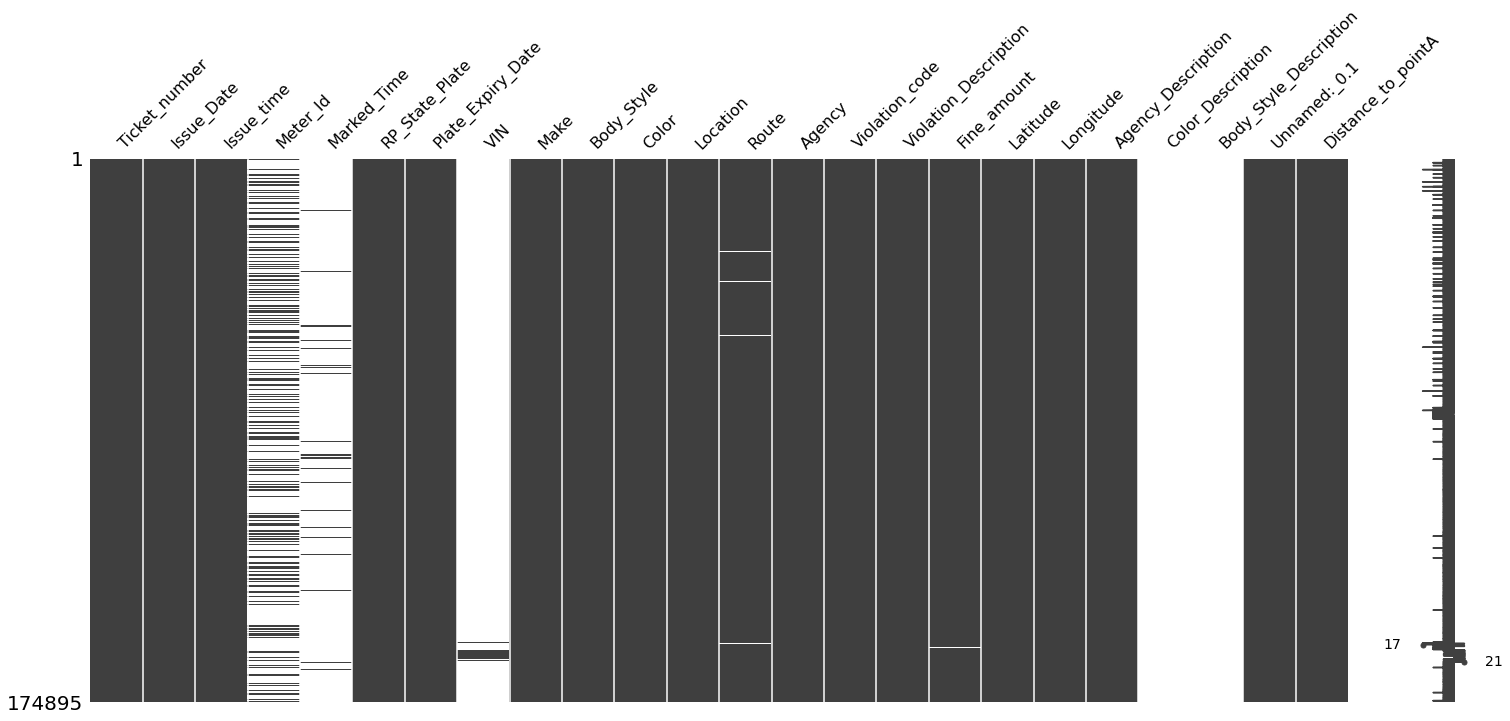

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df)

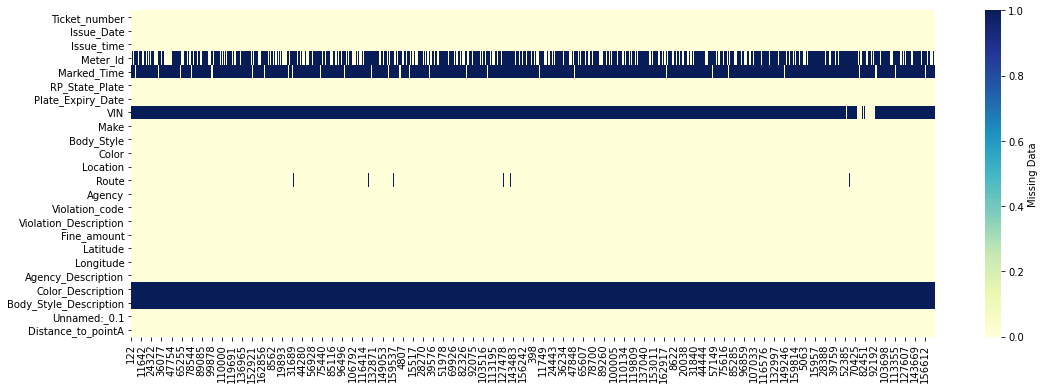

In [ ]:
# Vizialize missing data

plt.figure(figsize=(18,6))
sns.heatmap(df.isna().transpose(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'});
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 1440x432 with 0 Axes>

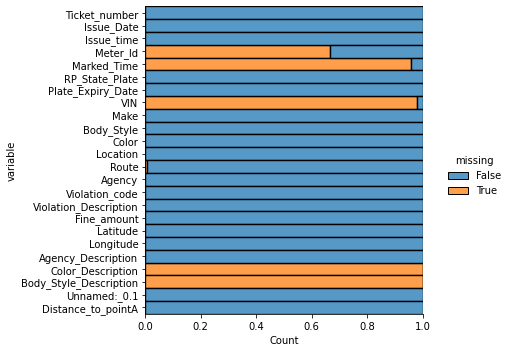

In [ ]:
#VIZ2

plt.figure(figsize=(20,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
);

In [ ]:
# Heres the function derived from the cells below

def drop_columns(df, threshold):
    '''
    drop columns from a dataframe over a threshold (0-1, percentage) missing data
    '''
    columns = (df.columns[df.isnull().mean() > threshold]).tolist()
    
    original_dimensions = df.shape
    df.drop(columns, axis = 1, inplace = True)
    final_dimensions = df.shape

    print(f'Original dimensions: {original_dimensions}')
    print(f'Dimensions after drop: {final_dimensions}')
    print(f'{original_dimensions[1]-final_dimensions[1]} columns dropped.')
    return df

In [ ]:
# Use function

df = drop_columns(df, 0.7)

Original dimensions: (174895, 24)
Dimensions after drop: (174895, 20)
4 columns dropped.


In [ ]:
# Find the columns with more than 70% missing values

columns_over_70 = (df.columns[df.isnull().mean() > 0.7]).tolist()
columns_over_70

Out[38]: []

In [ ]:
# Drop columns with more than 70% missing values 

original_dimensions = df.shape
df.drop(columns_over_70, axis = 1, inplace = True)
final_dimensions = df.shape

print(f'Original dimensions: {original_dimensions}')
print(f'Dimensions after drop: {final_dimensions}')
print(f'{original_dimensions[1]-final_dimensions[1]} columns dropped.')

Original dimensions: (174895, 20)
Dimensions after drop: (174895, 20)
0 columns dropped.


##### 10. Find RP_State_Plates that are not for US, then drop their data.

In [ ]:
# Read in state abbreviations
state = pd.read_csv('https://raw.githubusercontent.com/matthewbrennerCGI/state_abbreviations/main/State_Abbreviations.csv')

In [ ]:
state.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
states=state.Abbreviation.tolist()
states

Out[42]: ['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [ ]:
# Find records where state plate is not in acceptable list

df[~df['RP_State_Plate'].isin(states)]


,Ticket_number,Issue_Date,Issue_time,Meter_Id,RP_State_Plate,Plate_Expiry_Date,Make,Body_Style,Color,Location,Route,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Unnamed:_0.1,Distance_to_pointA
2544,4273283792,2015-12-30,1242.0,NaN,AB,201612.0,HYUN,PA,BK,3109 BEACHWOOD DR N,400,54.0,80.56E4+,RED ZONE,93.0,6465500.0,1868550.3,nan,2571.0,70629.377907
7271,4274360974,2015-12-30,815.0,NaN,MX,nan,JEEP,PA,WT,6800 ETIWANDA AVE,374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6400890.4,1893356.0,nan,7298.0,98743.987481
8251,1112719370,2015-12-29,1226.0,NaN,XX,201609.0,TOYO,PA,GY,7018 HAWTHORN AVE,487,54.0,8069BS,NO PARK/STREET CLEAN,73.0,6458094.5,1859071.4,nan,8278.0,59218.517707
8256,1112719425,2015-12-29,1304.0,NaN,XX,nan,HOND,PA,SI,7076 HAWTHORN AVE,487,54.0,8069BS,NO PARK/STREET CLEAN,73.0,6457486.4,1859071.7,nan,8283.0,59035.805041
14232,4274344734,2015-12-31,1318.0,NaN,MX,nan,TOYT,PA,TN,3161 SEPULVEDA BLVD,157,51.0,80.69BS,NO PARK/STREET CLEAN,73.0,6432288.7,1831851.7,nan,14259.0,30167.133529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157759,4250550360,2015-01-02,1404.0,96,MX,nan,MITS,PA,BN,1746 ORANGE DR N,452,54.0,80.58L,PREFERENTIAL PARKING,68.0,6458215.2,1859956.2,nan,991097.0,60098.075005
164025,4250644252,2015-01-06,1131.0,VW403,NaN,nan,HYUN,PA,WT,601 NEW HAMPSHIRE AV S,455,54.0,88.13B+,METER EXP.,63.0,6472951.5,1845667.2,nan,997363.0,54160.711071
164042,4250644425,2015-01-06,1353.0,NaN,NaN,nan,TOYT,PA,BK,5600 CLINTON ST,455,54.0,80.69BS,NO PARK/STREET CLEAN,73.0,6463659.6,1852267.5,nan,997380.0,54938.545494
164398,4250648684,2015-01-06,1011.0,NaN,NaN,nan,VOLK,PA,BK,340 PLYMOUTH BLVD N,451,54.0,80.69BS,NO PARK/STREET CLEAN,73.0,6464588.3,1850481.3,nan,997736.0,53750.560349


In [ ]:
# Drop records with plates outside of the 50 US states

original_dimensions = df.shape
df = df[df['RP_State_Plate'].isin(states)]
final_dimensions = df.shape
print(f'Original dimensions: {original_dimensions}')
print(f'Final dimensions: {final_dimensions}')
print(f'{original_dimensions[0] - final_dimensions[0]} rows dropped.')

Original dimensions: (174895, 20)
Final dimensions: (174508, 20)
387 rows dropped.


In [ ]:
def drop_oconus(df):
    '''
    Takes in a dataframe
    Drops rows of records where RP_State_Plate does not match one of the US 50 states
    Returns dataframe with only us states
    '''
    # Read in state abbreviations
    state = pd.read_csv('https://raw.githubusercontent.com/matthewbrennerCGI/state_abbreviations/main/State_Abbreviations.csv')
    # make a list of state abbreviations
    states=state.Abbreviation.tolist()
    # Dorop rows where records arent in the state list and print details
    original_dimensions = df.shape
    df = df[df['RP_State_Plate'].isin(states)]
    final_dimensions = df.shape
    print(f'Original dimensions: {original_dimensions}')
    print(f'Final dimensions: {final_dimensions}')
    print(f'{original_dimensions[0] - final_dimensions[0]} rows dropped.')
    return df


In [ ]:
df = drop_oconus(df)

Original dimensions: (174508, 20)
Final dimensions: (174508, 20)
0 rows dropped.


##### 11. Almost 4% of Fine_Amount column has missing values, handle these missing values.

In [ ]:
# Use your knowledge to handle the missing values, you need to impute values based on useful information of other columns 


##### 12. Split the "Location" column into new columns using SPACE as delimiter. You may need to write a function. The final splitted data should be structured like below (the number of columns may be different):
![address_columns.PNG](attachment:address_columns.PNG)

In [ ]:
df.head()

,Ticket_number,Issue_Date,Issue_time,Meter_Id,RP_State_Plate,Plate_Expiry_Date,Make,Body_Style,Color,Location,Route,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Unnamed:_0.1,Distance_to_pointA
122,1112078435,2015-12-16,1920.0,NaN,CA,201511.0,CHEV,VN,WH,400 WORLD WAY L/L,3C15B,2.0,8939,WHITE CURB,58.0,6439911.5,1802686.8,nan,149.0,85.503743
135,1112081062,2015-12-26,810.0,NaN,CA,201507.0,LEXU,PA,BK,101 WORLD WAY,1L206,2.0,4000A1,NO EVIDENCE OF REG,50.0,6439737.8,1802687.4,nan,162.0,259.203781
136,1112081073,2015-12-26,820.0,NaN,CA,201509.0,LEXU,PA,WH,101 WORLD WAY,1L206,2.0,4000A1,NO EVIDENCE OF REG,50.0,6439737.8,1802687.4,nan,163.0,259.203781
158,1112091400,2015-12-22,2200.0,NaN,CA,201605.0,TOYO,PA,GY,101 WORLD WAY 1E,3F22,2.0,225078A,HANDICAP/NO DP ID,363.0,6439737.8,1802687.4,nan,185.0,259.203781
167,1112094410,2015-12-15,1854.0,NaN,CA,201611.0,KIA,PA,GY,9019 S AIRPORT BL,5M28,2.0,80714,PRIVATE PROPERTY,68.0,6444686.7,1806252.4,nan,194.0,5891.731074


In [ ]:
def address_sep(df_pandas):
 
    *** WRITE YOUR CODE TO complete the function ***
    return df_pandas

df_pandas = address_sep(df_pandas)

  File "<command-2073302174308544>", line 3
    *** WRITE YOUR CODE TO complete the function ***
    ^
SyntaxError: invalid syntax


##### 13. Extract the "Issue_year" of  "Issue_Date" column and save it as a new column "Issue_year" as an integer type.

In [ ]:
df.dtypes

In [ ]:
# Make issue year column out of the datetime object issue date

df['Issue_year'] = df['Issue_Date'].dt.year
df.head()

,Ticket_number,Issue_Date,Issue_time,Meter_Id,RP_State_Plate,Plate_Expiry_Date,Make,Body_Style,Color,Location,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Unnamed:_0.1,Distance_to_pointA,Issue_year
122,1112078435,2015-12-16,1920.0,NaN,CA,201511.0,CHEV,VN,WH,400 WORLD WAY L/L,...,2.0,8939,WHITE CURB,58.0,6439911.5,1802686.8,nan,149.0,85.503743,2015
135,1112081062,2015-12-26,810.0,NaN,CA,201507.0,LEXU,PA,BK,101 WORLD WAY,...,2.0,4000A1,NO EVIDENCE OF REG,50.0,6439737.8,1802687.4,nan,162.0,259.203781,2015
136,1112081073,2015-12-26,820.0,NaN,CA,201509.0,LEXU,PA,WH,101 WORLD WAY,...,2.0,4000A1,NO EVIDENCE OF REG,50.0,6439737.8,1802687.4,nan,163.0,259.203781,2015
158,1112091400,2015-12-22,2200.0,NaN,CA,201605.0,TOYO,PA,GY,101 WORLD WAY 1E,...,2.0,225078A,HANDICAP/NO DP ID,363.0,6439737.8,1802687.4,nan,185.0,259.203781,2015
167,1112094410,2015-12-15,1854.0,NaN,CA,201611.0,KIA,PA,GY,9019 S AIRPORT BL,...,2.0,80714,PRIVATE PROPERTY,68.0,6444686.7,1806252.4,nan,194.0,5891.731074,2015


consider using mito sheets to reorder columns to get engineered columns into their logical order instead of being tacked on to the right

##### 14. Write the pandas dataframe into a Parquet file (cleaned_parking_citations) partition by "Year" column.

In [ ]:
#DataFrame.to_parquet(path, engine='auto', compression='snappy', index=None, partition_cols=None, **kwargs)

df_pandas.to_parquet(*** WRITE YOUR CODE TO complete the function ***)

In [ ]:
df_pandas.to_parquet(partition_cols='Issue_year')

---------------------------------------------------------------------------
ArrowInvalid                              Traceback (most recent call last)
<command-2267170048983411> in <module>
----> 1 df_pandas.to_parquet(partition_cols='Issue_year')

/databricks/python/lib/python3.8/site-packages/pandas/util/_decorators.py in wrapper(*args, **kwargs)
    197                 else:
    198                     kwargs[new_arg_name] = new_arg_value
--> 199             return func(*args, **kwargs)
    200 
    201         return cast(F, wrapper)

/databricks/python/lib/python3.8/site-packages/pandas/core/frame.py in to_parquet(self, path, engine, compression, index, partition_cols, storage_options, **kwargs)
   2453         from pandas.io.parquet import to_parquet
   2454 
-> 2455         return to_parquet(
   2456             self,
   2457             path,

/databricks/python/lib/python3.8/site-packages/pandas/io/parquet.py in to_parquet(df, path, engine, compression, index, storage_options